# Array programming example

Here we demonstrate how we can perform some data analysis with numpy arrays. 

There are some nice resources [here](https://www.datacamp.com/community/tutorials/python-numpy-tutorial) and [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) also. 

In [1]:
import numpy as np

## Create a 2-d array, with broadcasting

We'll create a 10x10 array with a couple of linspaces

First, we create a 10x1 array. Then, we create a 1x10 array and add them. The second array is *broadcast* to the shape of the first so it simply adds the value to the rows of a. 

In [2]:
a = np.linspace(0,9,10).reshape(10,1)
a

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [7.],
       [8.],
       [9.]])

In [3]:
b = np.linspace(0,9,10)
b

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [4]:
a = a + b
a

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
       [ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
       [ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.],
       [ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.],
       [ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.],
       [ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [ 9., 10., 11., 12., 13., 14., 15., 16., 17., 18.]])

## Element-wise operations, with broadcasting

We can also perform element-wise operations with broadcasting. The shape of the scalar "0.01" is expanded into a 10x10 array and added to `a`. 

In [5]:
a += 0.01
a

array([[1.000e-02, 1.010e+00, 2.010e+00, 3.010e+00, 4.010e+00, 5.010e+00,
        6.010e+00, 7.010e+00, 8.010e+00, 9.010e+00],
       [1.010e+00, 2.010e+00, 3.010e+00, 4.010e+00, 5.010e+00, 6.010e+00,
        7.010e+00, 8.010e+00, 9.010e+00, 1.001e+01],
       [2.010e+00, 3.010e+00, 4.010e+00, 5.010e+00, 6.010e+00, 7.010e+00,
        8.010e+00, 9.010e+00, 1.001e+01, 1.101e+01],
       [3.010e+00, 4.010e+00, 5.010e+00, 6.010e+00, 7.010e+00, 8.010e+00,
        9.010e+00, 1.001e+01, 1.101e+01, 1.201e+01],
       [4.010e+00, 5.010e+00, 6.010e+00, 7.010e+00, 8.010e+00, 9.010e+00,
        1.001e+01, 1.101e+01, 1.201e+01, 1.301e+01],
       [5.010e+00, 6.010e+00, 7.010e+00, 8.010e+00, 9.010e+00, 1.001e+01,
        1.101e+01, 1.201e+01, 1.301e+01, 1.401e+01],
       [6.010e+00, 7.010e+00, 8.010e+00, 9.010e+00, 1.001e+01, 1.101e+01,
        1.201e+01, 1.301e+01, 1.401e+01, 1.501e+01],
       [7.010e+00, 8.010e+00, 9.010e+00, 1.001e+01, 1.101e+01, 1.201e+01,
        1.301e+01, 1.401e+01, 1.501e+

## Functions of arrays

We can perform functions on elements of arrays with the same syntax you'd expect. These are called "ufuncs" in numpy (short for "universal functions). Here is an example with `sin()`:

In [6]:
sina = np.sin(a)
sina

array([[ 0.00999983,  0.84683184,  0.90509056,  0.13121319, -0.76330098,
        -0.95603975, -0.26979998,  0.66449265,  0.9878538 ,  0.40298673],
       [ 0.84683184,  0.90509056,  0.13121319, -0.76330098, -0.95603975,
        -0.26979998,  0.66449265,  0.9878538 ,  0.40298673, -0.55238449],
       [ 0.90509056,  0.13121319, -0.76330098, -0.95603975, -0.26979998,
         0.66449265,  0.9878538 ,  0.40298673, -0.55238449, -0.99989595],
       [ 0.13121319, -0.76330098, -0.95603975, -0.26979998,  0.66449265,
         0.9878538 ,  0.40298673, -0.55238449, -0.99989595, -0.52810769],
       [-0.76330098, -0.95603975, -0.26979998,  0.66449265,  0.9878538 ,
         0.40298673, -0.55238449, -0.99989595, -0.52810769,  0.42922035],
       [-0.95603975, -0.26979998,  0.66449265,  0.9878538 ,  0.40298673,
        -0.55238449, -0.99989595, -0.52810769,  0.42922035,  0.99192518],
       [-0.26979998,  0.66449265,  0.9878538 ,  0.40298673, -0.55238449,
        -0.99989595, -0.52810769,  0.42922035

## Array-wide operations, no need for broadcasting

We can also perform standard array operations. Here, "d" will have the same shape as `a`, as will `sina`. We will create an array that will be equal to ```1 + sin(a)``` and store it in `e`

In [7]:
d = np.ones_like(a)
d

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [8]:
e = d + sina
print("e=")
e

e=


array([[1.00999983e+00, 1.84683184e+00, 1.90509056e+00, 1.13121319e+00,
        2.36699017e-01, 4.39602457e-02, 7.30200015e-01, 1.66449265e+00,
        1.98785380e+00, 1.40298673e+00],
       [1.84683184e+00, 1.90509056e+00, 1.13121319e+00, 2.36699017e-01,
        4.39602457e-02, 7.30200015e-01, 1.66449265e+00, 1.98785380e+00,
        1.40298673e+00, 4.47615514e-01],
       [1.90509056e+00, 1.13121319e+00, 2.36699017e-01, 4.39602457e-02,
        7.30200015e-01, 1.66449265e+00, 1.98785380e+00, 1.40298673e+00,
        4.47615514e-01, 1.04048785e-04],
       [1.13121319e+00, 2.36699017e-01, 4.39602457e-02, 7.30200015e-01,
        1.66449265e+00, 1.98785380e+00, 1.40298673e+00, 4.47615514e-01,
        1.04048785e-04, 4.71892309e-01],
       [2.36699017e-01, 4.39602457e-02, 7.30200015e-01, 1.66449265e+00,
        1.98785380e+00, 1.40298673e+00, 4.47615514e-01, 1.04048785e-04,
        4.71892309e-01, 1.42922035e+00],
       [4.39602457e-02, 7.30200015e-01, 1.66449265e+00, 1.98785380e+00,
   

## Plot `1+sin(a)`

Now just to show what we can do from here, we use the `imshow` function in `matplotlib`. 

In [9]:
import matplotlib.pyplot as plt

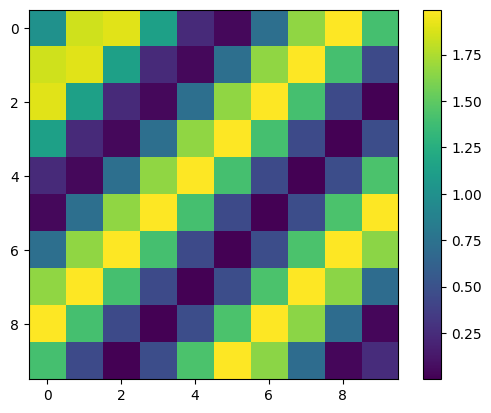

In [10]:
plt.imshow(e)
plt.colorbar()

# Equivalently, using local variables:
#fig, ax = plt.subplots(1, 1, figsize=(6, 4))
#colorplot = ax.pcolor(e)
#fig.colorbar(colorplot)


## Slices

We can change some bits of a with slices as well. Here we increment the "1" entry of all of the rows and re-plot. You can see the column has a different value. 


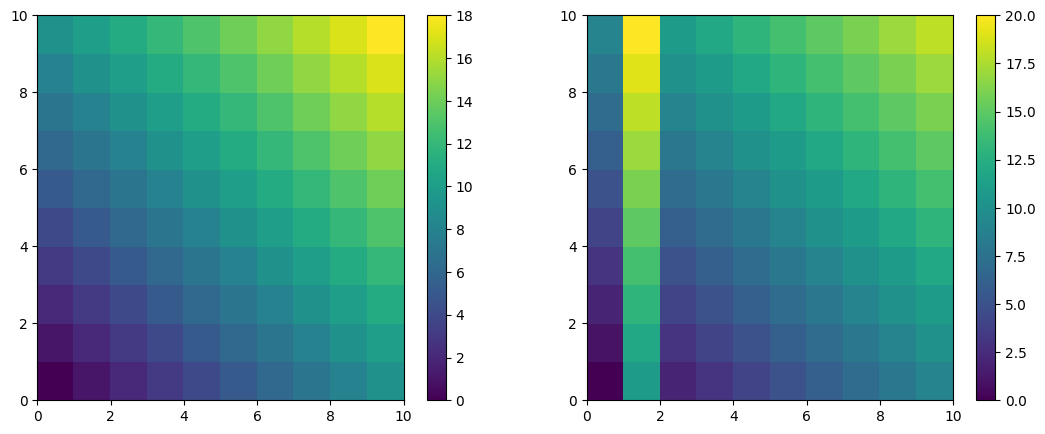

In [11]:
# Remake a from scratch
a = np.linspace(0,9,10)[:, np.newaxis] + np.linspace(0,9,10)[np.newaxis, :]

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
colorplot0 = axes[0].pcolor(a)
fig.colorbar(colorplot0)

b = a.copy()
b[:, 1] += 10
colorplot1 = axes[1].pcolor(b)
fig.colorbar(colorplot1)


## Selections

We can also make selections of the elements within the arrays. For instance, here we find everywhere the modified array is larger than 5. This returns a 2-d array with the same shape, and each element has the result of the comparison stored. 

In [12]:
a_sel = a > 5.
a_sel

array([[False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

## Fancy indexing

Now we can do something really cool. We can use `a_sel` as an index of a! It will give us the elements where `a > 5` as a 1-d array. 

In [13]:
a[a_sel]

array([ 6.,  7.,  8.,  9.,  6.,  7.,  8.,  9., 10.,  6.,  7.,  8.,  9.,
       10., 11.,  6.,  7.,  8.,  9., 10., 11., 12.,  6.,  7.,  8.,  9.,
       10., 11., 12., 13.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,  7.,  8.,  9.,
       10., 11., 12., 13., 14., 15., 16.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18.])

## np.where and indexing

The `np.where` function is very useful in this sense. It will preserve the shape of the original array and you can decide what to do with the rest. The syntax is

`where( selection, value_if_true, value_if_false)`. 

In [14]:
v = np.where( a_sel, a, 0)
v

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  7.,  8.,  9.],
       [ 0.,  0.,  0.,  0.,  0.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  0.,  0.,  0.,  6.,  7.,  8.,  9., 10., 11.],
       [ 0.,  0.,  0.,  6.,  7.,  8.,  9., 10., 11., 12.],
       [ 0.,  0.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
       [ 0.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.],
       [ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.],
       [ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.],
       [ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.],
       [ 9., 10., 11., 12., 13., 14., 15., 16., 17., 18.]])

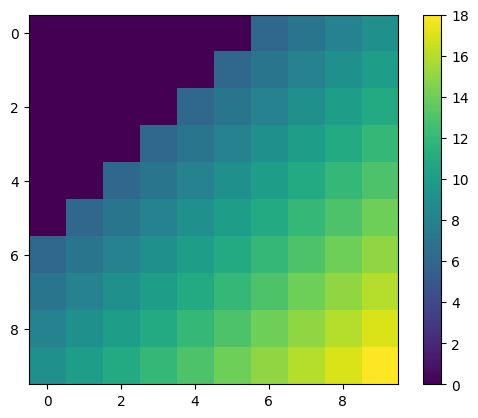

In [15]:
plt.imshow(v)
plt.colorbar();

## Combining arrays

We've seen that most of the arithmetic operations (`+`, `-`, etc) are elementwise in `numpy`. 

In [16]:
x = np.array([0,1,2])
y = np.array([3,4,5])

x + y

array([3, 5, 7])

But what about "array" arithemtic, like transposing, and concatenation? `numpy` supports those too. They usually have special function names. Be careful, the arguments are usually a tuple for the arguments (hence the "double parenthesis"). There are others too ("stacking") for you to play with. 

In [17]:
z = np.concatenate((x,y))
z

array([0, 1, 2, 3, 4, 5])

In [ ]:
z = np.stack((x, y), axis=1)
z